Wprowadz ktory wiersz chcesz analizowac: 3
Przewidziana liczba wypożyczeń: 4389 | Rzeczywista liczba wypożyczeń: 6299 | Różnica: 1910
Wspolczynnik determinacji r kwadrat: -0.55
Wprowadz ktory wiersz chcesz analizowac: 3
Przewidziana liczba wypożyczeń: 5870 | Rzeczywista liczba wypożyczeń: 6299 | Różnica: 429
Wspolczynnik determinacji r kwadrat: 0.0


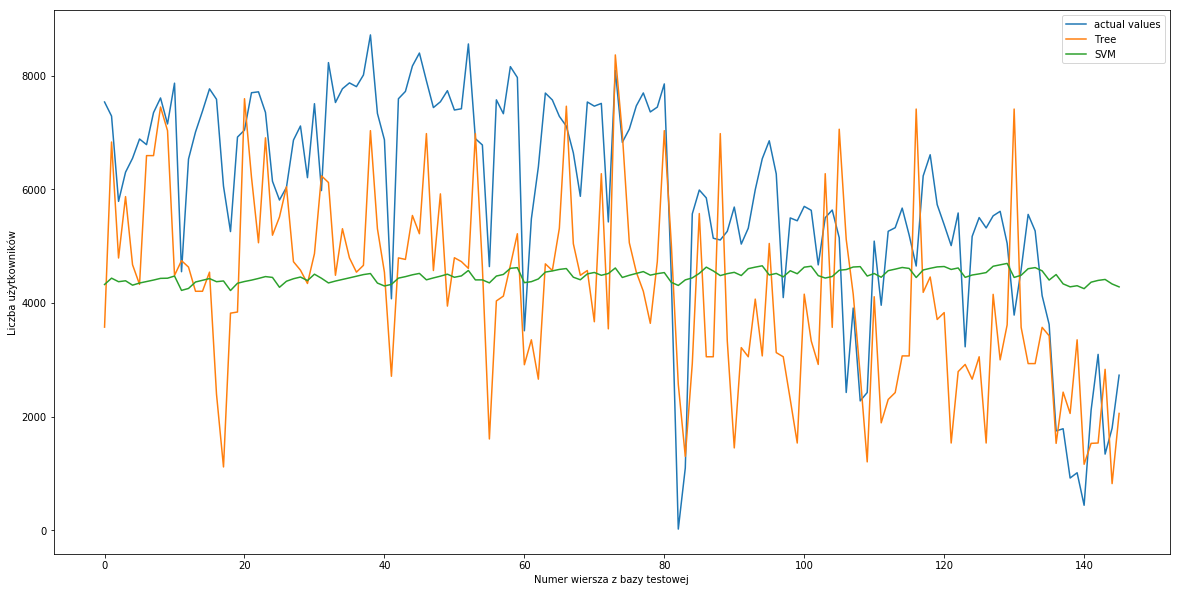

In [45]:
import pandas as pd
import numpy as np
import csv
from sklearn import svm
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.pyplot import figure

#variables
try:
    dataset = pd.read_csv("http://djo.com.pl/databases/filon/day.csv") #wczytanie zbioru danych
except:
    print("nie mozna odczytac pliku zrodlowego!")
    
iterator = 0
usersCount = []
usersCounttest = []
inputFlag = True

#utworzenie listy z liczba wypoczen - eksport kolumny z dataframe
while iterator < len(dataset.index):
    usersCount.append(dataset.iloc[iterator][15])
    iterator += 1
    
iterator = 0

#odrzucenie niepotrzebnych kolumn
dataset.drop(['instant', 'casual', 'registered','dteday', 'yr', 'cnt'], axis = 1, inplace = True)

#uczenie
clf = svm.SVR(kernel = 'linear') #wybór właściwego kernela wg. infografiki 
#https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
clf.fit(dataset.values, usersCount)

#przewidywanie
    #zaladowanie zestawu testowego
try:
    testset = pd.read_csv("http://djo.com.pl/databases/filon/test-day.csv")
    testsetplot = pd.read_csv("http://djo.com.pl/databases/filon/test-day.csv")
except:
    print("Nie mozna odczytac zestawu testowego!")
    
    #utworzenie listy z liczba wypozyczen z zestawu testowego
while iterator < len(testset.index):
    usersCounttest.append(testset.iloc[iterator][15])
    iterator += 1
    
     #odrzucenie niepotrzebnych atrybutow
testset.drop(['instant', 'casual', 'registered', 'dteday', 'yr', 'cnt'], axis = 1, inplace = True)
testset2 = testset.values.tolist()

    #index listy zestawu testowego
while (inputFlag):    
    index = input("Wprowadz ktory wiersz chcesz analizowac: ")
    if (int(index) > len(testset.index)):
        print("Indeks poza zakresem tablicy!")
        inputFlag = True
    else:
        inputFlag = False
    
index = int(index)
inputFlag = True

try:
    prediction = clf.predict([testset2[index]]) #przewidywanie liczby wypozyczen dla danego wiersza w zestawie testowym
    predictionArraySVM = clf.predict(testset)
except:
    print("Prediciton failed. Indeks poza zakresem tablicy!")
    
realCount = usersCounttest[index] #rzeczywista liczba wypozyczen dla porownania
predictedCount = int(round(prediction[0])) #zaokraglenie przewidzianej liczby
diff = realCount - predictedCount #obliczenie roznicy miedzy przewidziana liczba a rzeczywista liczba
print("Przewidziana liczba wypożyczeń: " + str(predictedCount) + " | Rzeczywista liczba wypożyczeń: " + str(realCount) + " | Różnica: " + str(diff))
score = round(clf.score(testset.values, usersCounttest), 2) #uzyskanie wartosci wspolczynnika determinacji r kwadrat
print("Wspolczynnik determinacji r kwadrat: " + str(score))

####################################################################3
#ponowne uczenie za pomoca innego algorytmu
#uczenie
clf2 = tree.DecisionTreeClassifier()
clf2.fit(dataset.values, usersCount)

  #index listy zestawu testowego
while (inputFlag):    
    index = input("Wprowadz ktory wiersz chcesz analizowac: ")
    if (int(index) > len(testset.index)):
        print("Indeks poza zakresem tablicy!")
        inputFlag = True
    else:
        inputFlag = False
    
index = int(index)

try:
    prediction = clf2.predict([testset2[index]]) #przewidywanie liczby wypozyczen dla danego wiersza w zestawie testowym
    predictionArrayTree = clf2.predict(testset)
except:
    print("Prediciton failed. Indeks poza zakresem tablicy!")
    
realCount = usersCounttest[index] #rzeczywista liczba wypozyczen dla porownania
predictedCount = int(round(prediction[0])) #zaokraglenie przewidzianej liczby
diff = realCount - predictedCount #obliczenie roznicy miedzy przewidziana liczba a rzeczywista liczba
print("Przewidziana liczba wypożyczeń: " + str(predictedCount) + " | Rzeczywista liczba wypożyczeń: " + str(realCount) + " | Różnica: " + str(diff))
score = round(clf2.score(testset.values, usersCounttest), 2) #uzyskanie wartosci wspolczynnika determinacji r kwadrat
print("Wspolczynnik determinacji r kwadrat: " + str(score))


x = testset.index.tolist()

plt.figure(figsize=(20,10))
plt.plot(x, usersCounttest, label = 'actual values')
plt.plot(x, predictionArrayTree, label = 'Tree')
plt.plot(x, predictionArraySVM, label = 'SVM')
plt.xlabel('Numer rekordu z bazy testowej')
plt.ylabel('Liczba użytkowników')
plt.legend()
